# Understanding Sports Markets
- Chapter 1 Miller

# Objectives
1. Examine and interpret salary distributions across groups
2. Examine relationship between salary and winning percentage
3. Calculate and/or estimation team values
4. Implement and interpret visualization techniques
5. Use histograms to explain differences in salary distributions across sports

### Modules

In [27]:
# system
import os
import sys

# Data management
import pandas
import numpy
## configure pandas display options
pandas.set_option('display.notebook_repr_html', False)
pandas.set_option('display.max_columns', 20)
pandas.set_option('display.max_rows', 25)
pandas.options.display.float_format = '{:,.2f}'.format

# Plots
%matplotlib inline
import matplotlib.pyplot as plt
import bokeh
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
output_notebook()

# learning
import statsmodels.api as sm

Loading BokehJS ...

### System management

In [28]:
list_files = os.listdir()
list_files

['.ipynb_checkpoints',
 '02a-player_salaries.ipynb',
 'homework',
 'mlb_payroll_performance_2014.csv']

In [29]:
len(list_files) #Number of files in list

4

### Load data

In [30]:
dm = pandas.read_csv('mlb_payroll_performance_2014.csv')
dm.head()

  team    payroll league  games  wins  losses  wlpct  runs  averuns  rundiff  \
0  LAA  128046500     AL    162    98      64   0.60  4.80     3.90     0.90   
1  BAL  105084121     AL    162    96      66   0.59  4.40     3.70     0.70   
2  WSN  134366735     NL    162    96      66   0.59  4.20     3.40     0.80   
3  LAD  241128402     NL    162    94      68   0.58  4.40     3.80     0.60   
4  STL  114020360     NL    162    90      72   0.56  3.80     3.70     0.10   

  textleft textright  
0      LAA       NaN  
1      BAL       NaN  
2      WSN       NaN  
3      LAD       NaN  
4      STL       NaN  

In [31]:
len(dm)

30

### Descriptive statistics 


In [32]:
# All data
dm.describe()

             payroll  games  wins  losses  wlpct  runs  averuns  rundiff
count          30.00  30.00 30.00   30.00  30.00 30.00    30.00    30.00
mean  112,720,745.07 162.00 81.00   81.00   0.50  4.07     4.07     0.00
std    44,775,292.91   0.00  9.60    9.60   0.06  0.36     0.43     0.50
min    44,985,800.00 162.00 64.00   64.00   0.40  3.30     3.40    -0.80
25%    82,637,189.00 162.00 73.00   74.00   0.45  3.82     3.80    -0.40
50%    98,901,704.50 162.00 80.50   81.50   0.50  4.00     3.95    -0.05
75%   131,600,147.00 162.00 88.00   89.00   0.54  4.35     4.40     0.30
max   241,128,402.00 162.00 98.00   98.00   0.60  4.80     5.00     1.00

In [33]:
# transform payroll to millions of dollars
dm['payroll_millions'] = dm['payroll']/1000000

In [34]:
dm.describe()

             payroll  games  wins  losses  wlpct  runs  averuns  rundiff  \
count          30.00  30.00 30.00   30.00  30.00 30.00    30.00    30.00   
mean  112,720,745.07 162.00 81.00   81.00   0.50  4.07     4.07     0.00   
std    44,775,292.91   0.00  9.60    9.60   0.06  0.36     0.43     0.50   
min    44,985,800.00 162.00 64.00   64.00   0.40  3.30     3.40    -0.80   
25%    82,637,189.00 162.00 73.00   74.00   0.45  3.82     3.80    -0.40   
50%    98,901,704.50 162.00 80.50   81.50   0.50  4.00     3.95    -0.05   
75%   131,600,147.00 162.00 88.00   89.00   0.54  4.35     4.40     0.30   
max   241,128,402.00 162.00 98.00   98.00   0.60  4.80     5.00     1.00   

       payroll_millions  
count             30.00  
mean             112.72  
std               44.78  
min               44.99  
25%               82.64  
50%               98.90  
75%              131.60  
max              241.13  

In [35]:
# mean payroll across leages
dm.groupby(['league'])['payroll'].mean()

league
AL   111,804,347.40
NL   113,637,142.73
Name: payroll, dtype: float64

(array([ 2.,  7.,  7.,  4.,  4.,  2.,  2.,  0.,  1.,  1.]),
 array([  44.9858   ,   64.6000602,   84.2143204,  103.8285806,
         123.4428408,  143.057101 ,  162.6713612,  182.2856214,
         201.8998816,  221.5141418,  241.128402 ]),
 <a list of 10 Patch objects>)

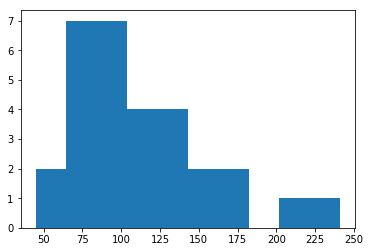

In [38]:
plt.hist(dm['payroll_millions'], bins=10)

(array([ 3.,  2.,  4.,  4.,  2.,  3.,  2.,  6.,  1.,  3.]),
 array([ 0.395,  0.416,  0.437,  0.458,  0.479,  0.5  ,  0.521,  0.542,
         0.563,  0.584,  0.605]),
 <a list of 10 Patch objects>)

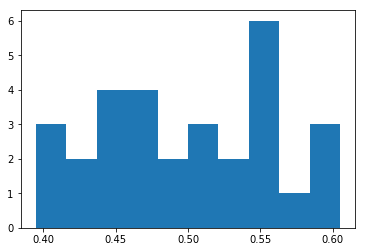

In [40]:
plt.hist(dm.wlpct, bins=10)

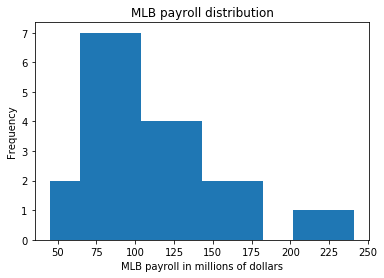

In [39]:
plt.hist(dm['payroll_millions'], bins=10)
plt.title("MLB payroll distribution")
plt.xlabel("MLB payroll in millions of dollars")
plt.ylabel("Frequency")
plt.show()

In [12]:
# Scatter plot
from bokeh.models import Title, Label, LabelSet
p = figure(title='Relationship between payroll and winning percentage',
           plot_width=700, 
           plot_height=400, 
           y_range = (0, 1),
           x_range = (0, 300)
          )
p.circle(y=dm.wlpct, x=dm.payroll_millions,  size=10, color="firebrick", alpha=0.5)
p.add_layout(Title(text="Winning percentage", align="center"), "left")
p.add_layout(Title(text="Payroll (in dollars)", align="center"), "below")
show(p)

### Linear regression

In [52]:
Y = dm.wlpct
X = sm.add_constant(dm.payroll_millions)
m1 = sm.OLS(Y, X).fit()
m1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.034    
Dependent Variable: wlpct            AIC:                -83.5078 
Date:               2018-01-23 09:53 BIC:                -80.7054 
No. Observations:   30               Log-Likelihood:     43.754   
Df Model:           1                F-statistic:        2.034    
Df Residuals:       28               Prob (F-statistic): 0.165    
R-squared:          0.068            Scale:              0.0033938
------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
------------------------------------------------------------------
const                0.4612   0.0292 15.7730 0.0000  0.4013 0.5210
payroll_millions     0.0003   0.0002  1.4263 0.1648 -0.0002 0.0008
------------------------------------------------------------------
Omnibus:              1.519         Durbin-Watson:           2.693
Prob(Omnibus):        0.468         Jarque-Bera (JB):        1.028
Skew:                 -0.110        Prob(JB):                0.598
Kurtosis:             2.120         Condition No.:           333  
==================================================================

"""

In [53]:
m1 = sm.OLS(Y, X).fit()
m1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.034    
Dependent Variable: wlpct            AIC:                -83.5078 
Date:               2018-01-23 09:53 BIC:                -80.7054 
No. Observations:   30               Log-Likelihood:     43.754   
Df Model:           1                F-statistic:        2.034    
Df Residuals:       28               Prob (F-statistic): 0.165    
R-squared:          0.068            Scale:              0.0033938
------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
------------------------------------------------------------------
const                0.4612   0.0292 15.7730 0.0000  0.4013 0.5210
payroll_millions     0.0003   0.0002  1.4263 0.1648 -0.0002 0.0008
------------------------------------------------------------------
Omnibus:              1.519         Durbin-Watson:           2.693
Prob(Omnibus):        0.468         Jarque-Bera (JB):        1.028
Skew:                 -0.110        Prob(JB):                0.598
Kurtosis:             2.120         Condition No.:           333  
==================================================================

"""

In [56]:
dm['WinHat1'] = m1.predict()
dm.head()

   team   payroll league  games  wins  losses  wlpct  runs  averuns  rundiff  \
25  HOU  44985800     AL    162    70      92   0.43  3.90     4.50    -0.60   
19  MIA  52836900     NL    162    77      85   0.47  4.00     4.20    -0.20   
15  ATL  76555673     NL    162    79      83   0.49  3.50     3.70    -0.10   
9   OAK  77220900     AL    162    88      74   0.54  4.50     3.50     1.00   
8   PIT  77340499     NL    162    88      74   0.54  4.20     3.90     0.30   

     textleft textright  payroll_millions  WinHat1  
25        NaN       HOU             44.99     0.48  
19        MIA       NaN             52.84     0.48  
15        ATL       NaN             76.56     0.49  
9         NaN       NaN             77.22     0.49  
8   PIT & OAK       NaN             77.34     0.49  

In [57]:
#sort values for line plot
dm = dm.sort_values(['WinHat1']) 
# Scatter plot
p = figure(title='Relationship between payroll and winning percentage',
           plot_width=700, 
           plot_height=400,
          y_range= (0,1))
p.circle(x=dm.payroll_millions, y=dm.wlpct, size=10, color="firebrick", alpha=0.8)
p.line(x=dm.payroll_millions, y=dm.WinHat1, color="black", alpha=0.8)
p.add_layout(Title(text="Winning percentage", align="center"), "left")
p.add_layout(Title(text="Payroll (in dollars)", align="center"), "below")

show(p)